<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Fernando Becerra Saavedra </em><br>

</div>

# **Visualización de la Información: Tarea N° 4**
*24 de Octubre de 2024*

**Nombre Estudiante(s)**: `Jaime Castillo Castro - Kurt Castro Ortega - Sofía Vits Contreras - Erick Cisterna Contreras`


**Dataset:** World Happiness Report- 2024

**Fuente:** https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated/data

### **I. GENERALIDADES**

#### **1. Descripción general del notebook**

Mediante el presente documento se abordarán procesos de Pre-Visualizaciones para definir cuál de ellas se utilizarán en el notebook final.

### **II. DESARROLLO**

#### **Paso 1: Importación de Librerías**

In [1121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
from mpl_toolkits.axisartist.grid_finder import DictFormatter
import mpl_toolkits.axisartist.floating_axes as floating_axes
from flexitext import flexitext
from matplotlib import lines
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle
from matplotlib.patches import Arrow
from matplotlib.patches import Circle
from matplotlib import patches
from matplotlib.collections import LineCollection

#### **Paso 2: Carga de Datos**

A continuación, se cargan los dataset: limpio, normalizado y estandarizado.

In [1122]:
# Cargar el datasets trabajdos previamente
ruta_df_cleaned = "../Data/dataset_limpio.csv"
ruta_df_normalized = "../Data/dataset_normalizado.csv"
ruta_df_standarized = "../Data/dataset_estandarizado.csv"

df_cleaned = pd.read_csv(ruta_df_cleaned, encoding='latin1')
df_normalized = pd.read_csv(ruta_df_normalized, encoding='latin1')
df_standarized = pd.read_csv(ruta_df_standarized, encoding='latin1')

Para trabajar el heatmap se utilizará el dataframe limpio trabajado en procesos anteriores. La idea es poder mostrar información con datos reales que permitan una fácil interpretación de la información

In [1123]:
# Revisar dimensiones del dataframe limpio
df_cleaned.shape

(2363, 12)

In [1124]:
# Revisar información básica sobre variables
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2363 non-null   float64
 4   Social support                    2363 non-null   float64
 5   Healthy life expectancy at birth  2363 non-null   float64
 6   Freedom to make life choices      2363 non-null   float64
 7   Generosity                        2363 non-null   float64
 8   Perceptions of corruption         2363 non-null   float64
 9   Positive affect                   2363 non-null   float64
 10  Negative affect                   2363 non-null   float64
 11  Continent                         2363 non-null   object 
dtypes: flo

In [1125]:
# Mostramos primeras filas del dataframe
df_cleaned.head(15)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Continent
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258,Asia
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237,Asia
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275,Asia
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267,Asia
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268,Asia
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.059,0.823,0.547,0.273,Asia
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.102,0.871,0.492,0.375,Asia
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.078,0.881,0.491,0.339,Asia
8,Afghanistan,2016,4.220,7.650,0.559,52.925,0.523,0.040,0.793,0.501,0.348,Asia
9,Afghanistan,2017,2.662,7.648,0.491,53.250,0.427,-0.123,0.954,0.435,0.371,Asia


In [1126]:
# Mostrar los valores únicos en las columnas 'Continent', 'Country name' y 'year'
continent_values = df_cleaned['Continent'].unique() if 'Continent' in df_cleaned.columns else "No 'continent' column found"
country_values = df_cleaned['Country name'].unique() if 'Country name' in df_cleaned.columns else "No 'Country name' column found"
year_values = df_cleaned['year'].unique() if 'year' in df_cleaned.columns else "No 'year' column found"

continent_values, country_values, year_values

(array(['Asia', 'Europe', 'Africa', 'South America', 'Oceania',
        'North America'], dtype=object),
 array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
        'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
        'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
        'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
        'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
        'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
        'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
        'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
        'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
        'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
        'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
        'Hong Kong S.A.R. of China', 'Hungary', 'Iceland',

In [1127]:
# Selecciono solo las variables numéricas, quitamos el año (year)

df = df_cleaned.select_dtypes(include=['float64', 'int64'])
df_numeric = df.drop(columns='year')
df_numeric.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


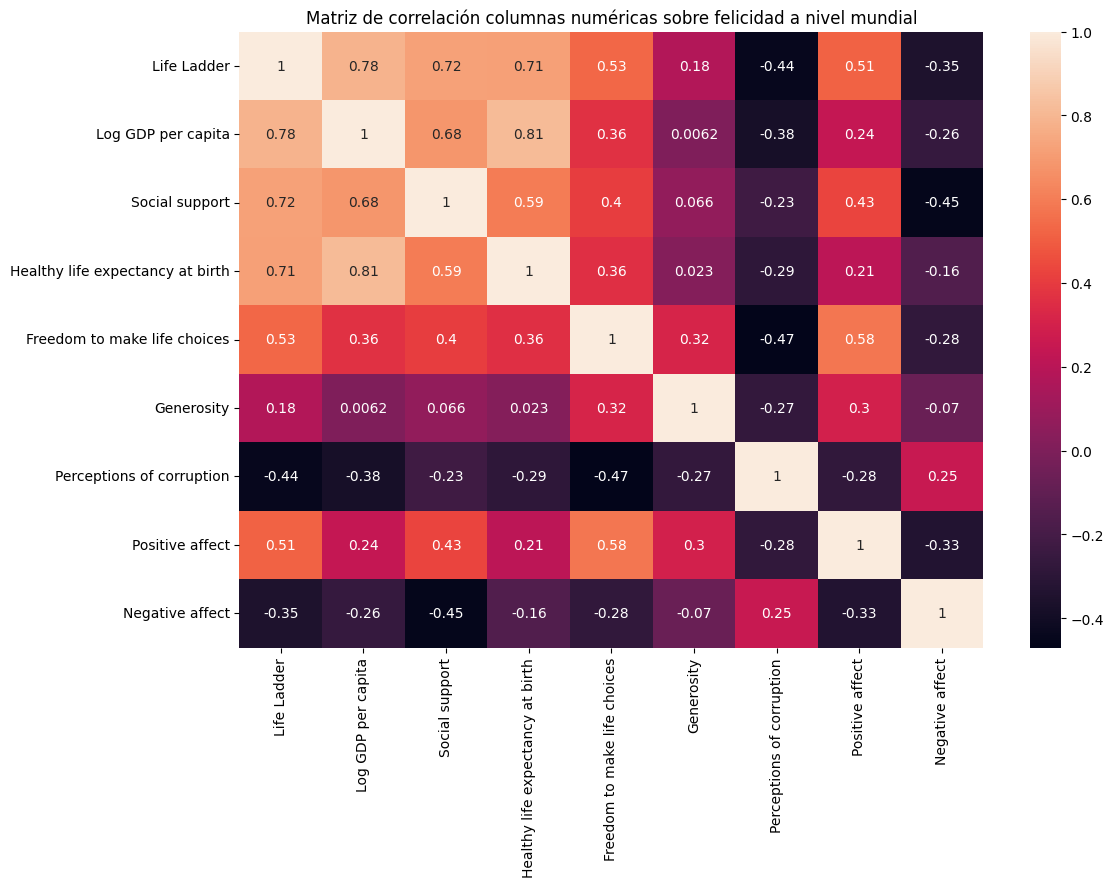

In [1128]:
# Previsualizaciones de Heatmap

# Calcular matiz de correlación
correlation_matrix = df_numeric.corr(numeric_only=True)

# Ajustar tamaño del gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Dibujar el heatmap 
sns.heatmap(correlation_matrix, ax=ax, annot=True)
plt.title("Matriz de correlación columnas numéricas sobre felicidad a nivel mundial")
plt.show()


**Observaciones:**

- A nivel mundial, la Satisfacción de la Vida (`Life Ladder`) presenta mayor correlación con las variables: PIB per cápita (`Log GRP per capita`) con un 0.78, el Apoyo Social (`Social support`) con un 0.72, la Esperanza de Vida saludable al nacer (`Healthy life expectancy at birth`) con un 0.71, y también, la Libertad de Elección (`Freedom to make life choices`) con un 0.53. Podríamos inferir que estas 4 variables contibuyen de forma positiva en la Satisfacción de vida de las personas.
- Por otro lado, la variable Percepción sobre la Corrupción (`Perceptions of corruption`) tiene una correlación de -0.44 respecto a la Satisfacción de la vida; mientras que el Afecto Negativo (`Negative affect`) tiene una correlación de -0.35. Podemos inferir que estas variables provocan una disminución respecto a la medida de Satisfacción de la Vida en las personas.

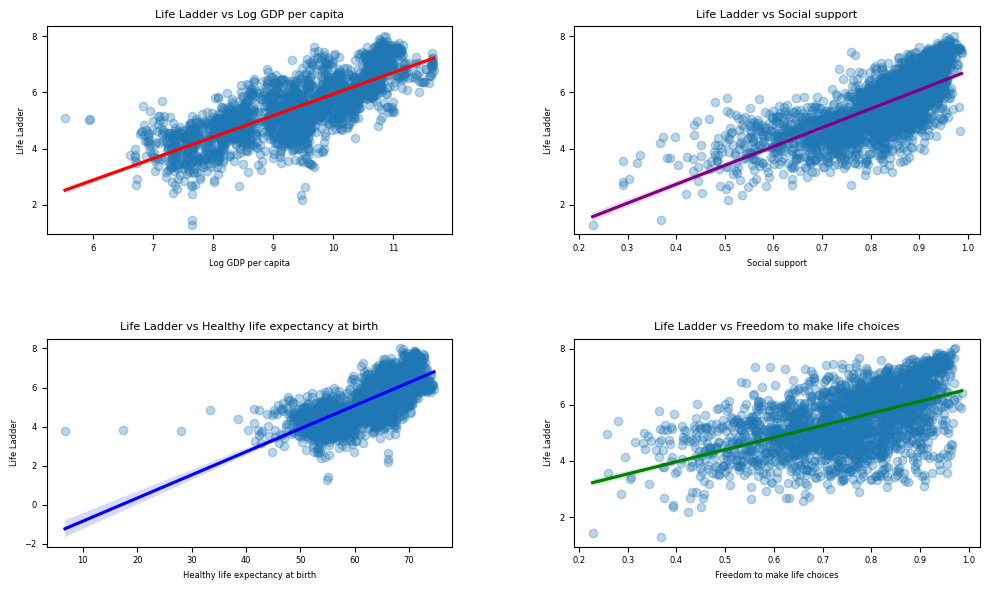

In [1129]:
# ---- REFLEJAMOS LA RELACIÓN ENTRE VARIABLES QUE TIENEN UN IMPACTO POSITIVO SOBRE LIFE LADDER, SEGÚN INFORMACIÓN ENTREGADA POR EL HEATMAP ----

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Parámetros personalizables
titulo_size = 8
ejes_size = 6
ticks_size = 6

# Subplot 1: Life Ladder vs Log GDP per capita
plt.subplot(2, 2, 1)  # Primera fila, primera columna
sns.regplot(x='Log GDP per capita', y='Life Ladder', data=df, 
            scatter_kws={'alpha': 0.3, 'marker': 'o'}, line_kws={'color': 'red'})
plt.title('Life Ladder vs Log GDP per capita', fontsize=titulo_size)
plt.xlabel('Log GDP per capita', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(fontsize=ticks_size)

# Subplot 2: Life Ladder vs Social support
plt.subplot(2, 2, 2)  # Primera fila, segunda columna
sns.regplot(x='Social support', y='Life Ladder', data=df, 
            scatter_kws={'alpha': 0.3, 'marker': 'o'}, line_kws={'color': 'purple'})
plt.title('Life Ladder vs Social support', fontsize=titulo_size)
plt.xlabel('Social support', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(fontsize=ticks_size)

# Subplot 3: Life Ladder vs Healthy life expectancy at birth
plt.subplot(2, 2, 3)  # Segunda fila, primera columna
sns.regplot(x='Healthy life expectancy at birth', y='Life Ladder', data=df, 
            scatter_kws={'alpha': 0.3, 'marker': 'o'}, line_kws={'color': 'blue'})
plt.title('Life Ladder vs Healthy life expectancy at birth', fontsize=titulo_size)
plt.xlabel('Healthy life expectancy at birth', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(fontsize=ticks_size)

# Subplot 4: Life Ladder vs Freedom to make life choices
plt.subplot(2, 2, 4)  # Segunda fila, segunda columna
sns.regplot(x='Freedom to make life choices', y='Life Ladder', data=df, 
            scatter_kws={'alpha': 0.3, 'marker': 'o'}, line_kws={'color': 'green'})
plt.title('Life Ladder vs Freedom to make life choices', fontsize=titulo_size)
plt.xlabel('Freedom to make life choices', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(fontsize=ticks_size)

# Ajustar el layout para que no se solapen
plt.tight_layout()

# Ajustar el espacio entre los gráficos
plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Incrementa el espacio entre los gráficos

# Mostrar la gráfica
plt.show()


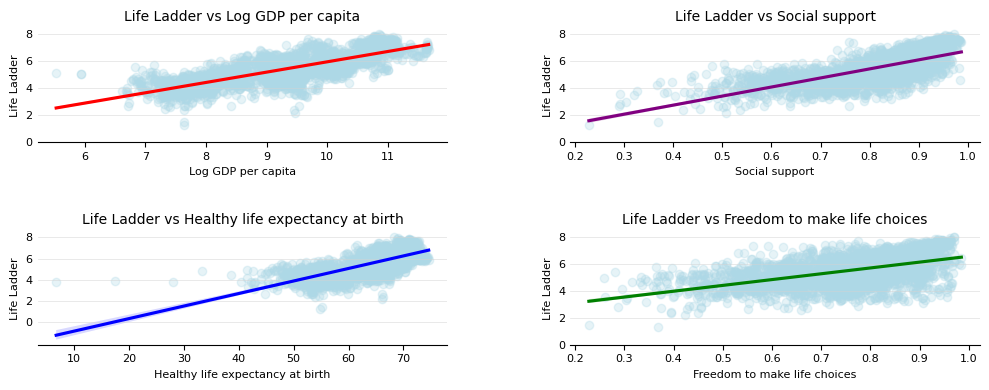

In [1130]:
# ---- REFLEJAMOS LA RELACIÓN ENTRE VARIABLES QUE TIENEN UN IMPACTO POSITIVO SOBRE LIFE LADDER, SEGÚN INFORMACIÓN ENTREGADA POR EL HEATMAP ----

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 4))

# Parámetros personalizables
titulo_size = 10
ejes_size = 8
ticks_size = 8
bubble_color = 'lightblue'  # Color editable de las burbujas

# Subplot 1: Life Ladder vs Log GDP per capita
plt.subplot(2, 2, 1)  # Primera fila, primera columna
sns.regplot(x='Log GDP per capita', y='Life Ladder', data=df, 
            scatter_kws={'alpha': 0.3, 'color': bubble_color, 'marker': 'o'}, line_kws={'color': 'red'})
plt.title('Life Ladder vs Log GDP per capita', fontsize=titulo_size)
plt.xlabel('Log GDP per capita', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(ticks=range(0, 9, 2), fontsize=ticks_size)  # Ajustar el eje Y para que tenga ticks de 2 en 2

# Eliminar los ticks del eje Y
plt.tick_params(axis='y', length=0)

# Agregar líneas de fondo grises y ajustar su estilo
plt.grid(True, which='both', axis ='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)

# Eliminar las líneas negras de los ejes (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)


# Subplot 2: Life Ladder vs Social support
plt.subplot(2, 2, 2)  # Primera fila, segunda columna
sns.regplot(x='Social support', y='Life Ladder', data=df, 
            scatter_kws={'alpha': 0.3, 'color': bubble_color, 'marker': 'o'}, line_kws={'color': 'purple'})
plt.title('Life Ladder vs Social support', fontsize=titulo_size)
plt.xlabel('Social support', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(ticks=range(0, 9, 2), fontsize=ticks_size)  # Ajustar el eje Y para que tenga ticks de 2 en 2

# Eliminar los ticks del eje Y
plt.tick_params(axis='y', length=0)

# Agregar líneas de fondo grises y ajustar su estilo
plt.grid(True, which='both', axis ='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)

# Eliminar las líneas negras de los ejes (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)


# Subplot 3: Life Ladder vs Healthy life expectancy at birth
plt.subplot(2, 2, 3)  # Segunda fila, primera columna
sns.regplot(x='Healthy life expectancy at birth', y='Life Ladder', data=df, 
            scatter_kws={'alpha': 0.3, 'color': bubble_color, 'marker': 'o'}, line_kws={'color': 'blue'})
plt.title('Life Ladder vs Healthy life expectancy at birth', fontsize=titulo_size)
plt.xlabel('Healthy life expectancy at birth', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(ticks=range(0, 9, 2), fontsize=ticks_size)  # Ajustar el eje Y para que tenga ticks de 2 en 2

# Eliminar los ticks del eje Y
plt.tick_params(axis='y', length=0)

# Agregar líneas de fondo grises y ajustar su estilo
plt.grid(True, which='both', axis ='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)

# Eliminar las líneas negras de los ejes (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)


# Subplot 4: Life Ladder vs Freedom to make life choices
plt.subplot(2, 2, 4)  # Segunda fila, segunda columna
sns.regplot(x='Freedom to make life choices', y='Life Ladder', data=df, 
            scatter_kws={'alpha': 0.3, 'color': bubble_color, 'marker': 'o'}, line_kws={'color': 'green'})
plt.title('Life Ladder vs Freedom to make life choices', fontsize=titulo_size)
plt.xlabel('Freedom to make life choices', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(ticks=range(0, 9, 2), fontsize=ticks_size)  # Ajustar el eje Y para que tenga ticks de 2 en 2

# Eliminar los ticks del eje Y
plt.tick_params(axis='y', length=0)

# Agregar líneas de fondo grises y ajustar su estilo
plt.grid(True, which='both', axis ='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)

# Eliminar las líneas negras de los ejes (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)


# Ajustar el layout para que no se solapen
plt.tight_layout()

# Ajustar el espacio entre los gráficos
plt.subplots_adjust(wspace=0.3, hspace=0.8)

# Mostrar la gráfica
plt.show()


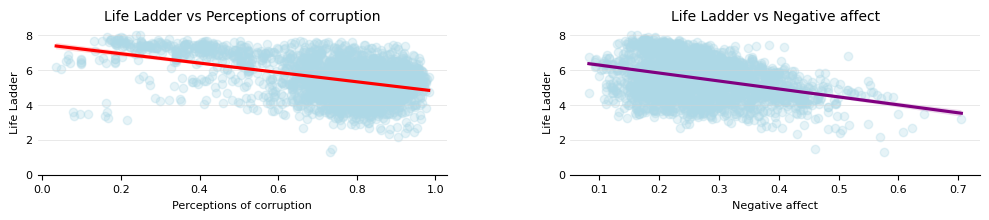

In [1131]:
# ---- REFLEJAR RELACIÓN ENTRE VARIABLES QUE TIENEN UN IMPACTO NEGATIVO SOBRE LIFE LADDER ----

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 4))

# Parámetros personalizables
titulo_size = 10
ejes_size = 8
ticks_size = 8
bubble_color = 'lightblue'  # Color editable de las burbujas

# Subplot 1: Life Ladder vs Perceptions of corruption
plt.subplot(2, 2, 1)  # Primera fila, primera columna
sns.regplot(x='Perceptions of corruption', y='Life Ladder', data=df, 
            scatter_kws={'alpha': 0.3, 'color': bubble_color, 'marker': 'o'}, line_kws={'color': 'red'})
plt.title('Life Ladder vs Perceptions of corruption', fontsize=titulo_size)
plt.xlabel('Perceptions of corruption', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(ticks=range(0, 9, 2), fontsize=ticks_size)  # Ajustar el eje Y para que tenga ticks de 2 en 2

# Eliminar los ticks del eje Y
plt.tick_params(axis='y', length=0)

# Agregar líneas de fondo grises y ajustar su estilo
plt.grid(True, which='both', axis ='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)

# Eliminar las líneas negras de los ejes (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)

# Subplot 2: Life Ladder vs Negative affect
plt.subplot(2, 2, 2)  # Primera fila, segunda columna (disposición 2x2)
sns.regplot(x='Negative affect', y='Life Ladder', data=df, 
            scatter_kws={'alpha': 0.3, 'color': bubble_color, 'marker': 'o'}, line_kws={'color': 'purple'})
plt.title('Life Ladder vs Negative affect', fontsize=titulo_size)
plt.xlabel('Negative affect', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(ticks=range(0, 9, 2), fontsize=ticks_size)  # Ajustar el eje Y para que tenga ticks de 2 en 2

# Eliminar los ticks del eje Y
plt.tick_params(axis='y', length=0)

# Agregar líneas de fondo grises y ajustar su estilo
plt.grid(True, which='both', axis ='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)

# Eliminar las líneas negras de los ejes (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)

# Ajustar el layout para que no se solapen
plt.tight_layout()

# Ajustar el espacio entre los gráficos
plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Ajuste del espacio entre gráficos

# Mostrar la gráfica
plt.show()





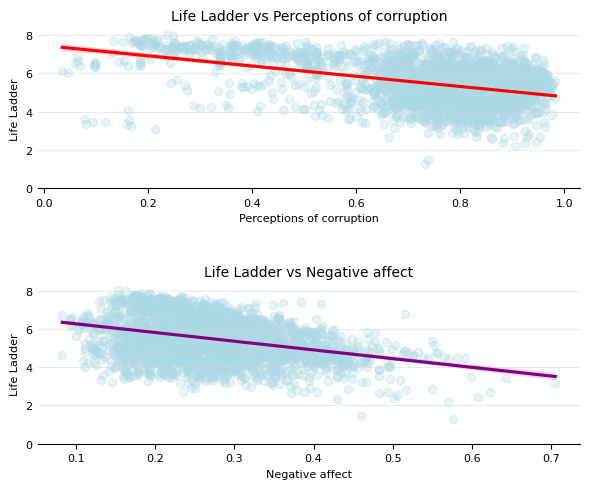

In [1132]:
# ---- REFLEJAR RELACIÓN ENTRE VARIABLES QUE TIENEN UN IMPACTO NEGATIVO SOBRE LIFE LADDER ----

# Establecer el tamaño del gráfico
plt.figure(figsize=(6, 5))

# Parámetros personalizables
titulo_size = 10
ejes_size = 8
ticks_size = 8
bubble_color = 'lightblue'  # Color editable de las burbujas

# Subplot 1: Life Ladder vs Perceptions of corruption
plt.subplot(2, 1, 1)  # Primera fila, primer gráfico (disposición 2x1)
sns.regplot(x='Perceptions of corruption', y='Life Ladder', data=df, 
            scatter_kws={'alpha': 0.3, 'color': bubble_color, 'marker': 'o'}, line_kws={'color': 'red'})
plt.title('Life Ladder vs Perceptions of corruption', fontsize=titulo_size)
plt.xlabel('Perceptions of corruption', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(ticks=range(0, 9, 2), fontsize=ticks_size)  # Ajustar el eje Y para que tenga ticks de 2 en 2

# Eliminar los ticks del eje Y
plt.tick_params(axis='y', length=0)

# Agregar líneas de fondo grises y ajustar su estilo
plt.grid(True, which='both', axis ='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)

# Eliminar las líneas negras de los ejes (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)

# Subplot 2: Life Ladder vs Negative affect
plt.subplot(2, 1, 2)  # Segunda fila, segundo gráfico (disposición 2x1)
sns.regplot(x='Negative affect', y='Life Ladder', data=df, 
            scatter_kws={'alpha': 0.3, 'color': bubble_color, 'marker': 'o'}, line_kws={'color': 'purple'})
plt.title('Life Ladder vs Negative affect', fontsize=titulo_size)
plt.xlabel('Negative affect', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(ticks=range(0, 9, 2), fontsize=ticks_size)  # Ajustar el eje Y para que tenga ticks de 2 en 2

# Eliminar los ticks del eje Y
plt.tick_params(axis='y', length=0)

# Agregar líneas de fondo grises y ajustar su estilo
plt.grid(True, which='both', axis ='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)

# Eliminar las líneas negras de los ejes (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)

# Ajustar el layout para que no se solapen
plt.tight_layout()

# Ajustar el espacio entre los gráficos
plt.subplots_adjust(wspace=0.5, hspace=0.6)  # Ajuste del espacio entre gráficos

# Mostrar la gráfica
plt.show()

In [1133]:
# Definir función para rotar de ejes

def rotate_axes(fig, rect, angle):
    tr = Affine2D().scale(1, 1).rotate_deg(angle)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, correlation_matrix.shape[0],0, correlation_matrix.shape[0]))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)

    fig.add_subplot(ax1) 
    ax1.axis[:].set_visible(False)
    aux_ax = ax1.get_aux_axes(tr)
    return aux_ax

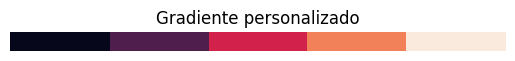

In [1134]:
# Definir paleta de colores para heatmap

colores_personalizados = ['#06071b', '#07081f', '#1d122d', '#30183b', '#431c46','#491e4a','#682056',
                          '#891d5b','#a41a5b','#b91658','#c81952','#dc2b47','#e43840','#e8403c','#f36e4b',
                          '#f2704c','#f3865d','#f6ab82','#f7b48f','#f6bc99','#f9e0cd','#faeadd']  # Gradiente de color oscuro a claro

# Paleta de colores personalizado a partir de la lista de colores
mi_paleta = LinearSegmentedColormap.from_list("mi_paleta", colores_personalizados, N=5)

# Crear un gradiente lineal
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))  # Se apila para que el gradiente sea continuo

# Mostrar la imagen del gradiente
plt.imshow(gradient, aspect=5, cmap=mi_paleta)  # Cambia el aspecto para hacerlo más angosto
plt.title('Gradiente personalizado')
plt.axis('off')  # Ocultar los ejes
plt.show()

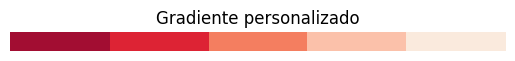

In [1135]:
# Definir nueva paleta de colores para heatmap

colores_personalizados_2 = ['#a20d32','#ee2e3e','#d71634','#ef4d35','#f36f51','#f68d6f','#f8a98e','#fcc9b4','#fde2d6','#faeadd']  # Gradiente de color oscuro a claro

# Paleta de colores personalizado a partir de la lista de colores
mi_paleta_2 = LinearSegmentedColormap.from_list("mi_paleta_2", colores_personalizados_2, N=5)

# Crear un gradiente lineal
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))  # Se apila para que el gradiente sea continuo

# Mostrar la imagen del gradiente
plt.imshow(gradient, aspect=5, cmap=mi_paleta_2)  # Cambia el aspecto para hacerlo más angosto
plt.title('Gradiente personalizado')
plt.axis('off')  # Ocultar los ejes
plt.show()

#### **VISUALIZACIÓN FINAL**

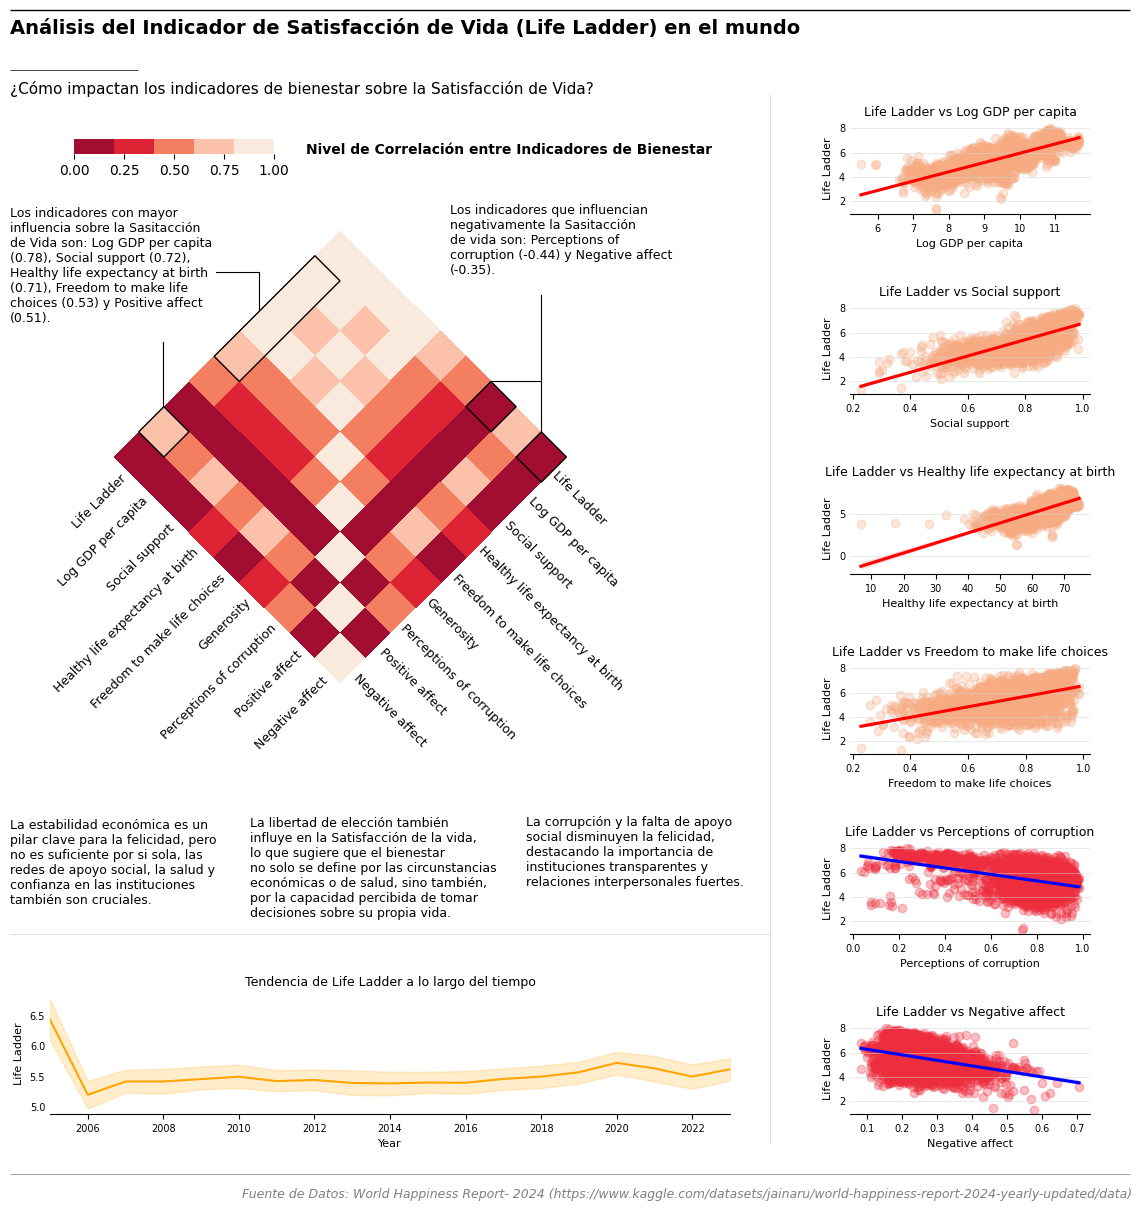

In [1136]:
# Previsualizaciones de Heatmap rotado

# Calcular matiz de correlación
correlation_matrix = df_numeric.corr(numeric_only=True)

# Ajustar tamaño del gráfico
fig, ax = plt.subplots(figsize=(8, 6))
ax0 = rotate_axes(fig, 111, -135)

# Dibujar el heatmap 
sns.heatmap(correlation_matrix, annot=False, cmap=mi_paleta_2, ax=ax0, linewidths=False, cbar=False)


# ---- Añadir etiquetas a los ejes del heatmap ----

plt.text(-7.4, -8.4, 'Life Ladder', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(-7.8, -10.0, 'Log GDP per capita', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(-6.4, -10.15, 'Social support', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(-7.9, -13.0, 'Healthy life expectancy at birth', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(-6.85, -13.45, 'Freedom to make life choices', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(-3.85, -11.8, 'Generosity', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(-4.9, -14.3, 'Perceptions of corruption', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(-2.8, -13.71, 'Positive affect', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(-2.26, -14.6, 'Negative affect', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)

plt.text(0.36, -12.6, 'Negative affect', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(1.1, -11.88, 'Positive affect', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(1.7, -11.2, 'Perceptions of corruption', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(2.4, -10.45, 'Generosity', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(3.15, -9.8, 'Freedom to make life choices', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(3.87, -9.0, 'Healthy life expectancy at birth', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(4.6, -8.3, 'Social support', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(5.28, -7.62, 'Log GDP per capita', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(5.95, -6.9, 'Life Ladder', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)


# ---- Añadir Titulo, Subtítulo, Líneas -----

# Título principal
plt.text(0.1, 1.2, "Análisis del Indicador de Satisfacción de Vida (Life Ladder) en el mundo", 
     fontsize=14, fontweight='bold', ha='left', transform=fig.transFigure)
    
# Insertar la línea sobre el título
fig.add_artist(
    plt.Line2D([0.1, 1.5], [1.24, 1.24], lw=1, color="black", solid_capstyle="butt", transform=fig.transFigure)
)

# Subtítulo
plt.text(x=0.1, y=1.1, s="¿Cómo impactan los indicadores de bienestar sobre la Satisfacción de Vida?", 
         fontsize=11, fontweight='normal', ha='left', transform=fig.transFigure)

# Insertar Línea corta sobre el subtítulo
fig.add_artist(
    plt.Line2D([0.1, 0.26], [1.14, 1.14], lw=0.5, color="black", solid_capstyle="butt", transform=fig.transFigure)
)

# ----- Incorporar Gradiente de Colores sobre Heatmap ----

# Crear un eje separado para la barra de color en la parte superior derecha
cbar_ax = fig.add_axes([0.18, 1.0, 0.25, 0.025])  # [left, bottom, width, height]

# Generar la barra de color en el eje separado
sm = plt.cm.ScalarMappable(cmap=mi_paleta_2, norm=plt.Normalize(vmin=0, vmax=1))
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', ticks=[0,0.25, 0.5,0.75, 1])

# Eliminar el contorno de la barra de color
cbar.outline.set_visible(False)

# Mover los ticks más hacia el centro (interior) de la barra
cbar.ax.tick_params(axis='x', which='both', direction='out')  # Ticks hacia adentro de la barra

# Añadir título de la barra de color
plt.text(0.47, 1.0, 'Nivel de Correlación entre Indicadores de Bienestar ', fontsize=10, fontweight='bold', ha='left', transform=fig.transFigure)  # Negrita


# ---- Añadir Gráficos de Regresión encima del Heatmap ----

# Gráfico 1: Life Ladder vs Log GDP per capita
reg_ax1 = fig.add_axes([1.15, 0.9, 0.3, 0.15])  # Posicionar gráfico en coordenadas específicas
sns.regplot(x='Log GDP per capita', y='Life Ladder', data=df, scatter_kws={'alpha': 0.3, 'color': '#f6ab82', 'marker': 'o'}, line_kws={'color': 'red'}, ax=reg_ax1)
reg_ax1.set_title('Life Ladder vs Log GDP per capita', fontsize=9)
reg_ax1.set_xlabel('Log GDP per capita', fontsize=8)
reg_ax1.set_ylabel('Life Ladder', fontsize=8)
reg_ax1.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
reg_ax1.tick_params(labelsize=7)
reg_ax1.tick_params(axis='y', length=0)
reg_ax1.spines['top'].set_visible(False)
reg_ax1.spines['right'].set_visible(False)
reg_ax1.spines['left'].set_visible(False)
reg_ax1.spines['bottom'].set_visible(True)

# Gráfico 2: Life Ladder vs Social support
reg_ax1 = fig.add_axes([1.15, 0.6, 0.3, 0.15])  # Posicionar gráfico en coordenadas específicas
sns.regplot(x='Social support', y='Life Ladder', data=df, scatter_kws={'alpha': 0.3, 'color': '#f6ab82', 'marker': 'o'}, line_kws={'color': 'red'}, ax=reg_ax1)
reg_ax1.set_title('Life Ladder vs Social support', fontsize=9)
reg_ax1.set_xlabel('Social support', fontsize=8)
reg_ax1.set_ylabel('Life Ladder', fontsize=8)
reg_ax1.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
reg_ax1.tick_params(labelsize=7)
reg_ax1.tick_params(axis='y', length=0)
reg_ax1.spines['top'].set_visible(False)
reg_ax1.spines['right'].set_visible(False)
reg_ax1.spines['left'].set_visible(False)
reg_ax1.spines['bottom'].set_visible(True)

# Gráfico 3: Life Ladder vs Healthy life expectancy at birth
reg_ax1 = fig.add_axes([1.15, 0.3, 0.3, 0.15])  # Posicionar gráfico en coordenadas específicas
sns.regplot(x='Healthy life expectancy at birth', y='Life Ladder', data=df, scatter_kws={'alpha': 0.3, 'color': '#f6ab82', 'marker': 'o'}, line_kws={'color': 'red'}, ax=reg_ax1)
reg_ax1.set_title('Life Ladder vs Healthy life expectancy at birth', fontsize=9)
reg_ax1.set_xlabel('Healthy life expectancy at birth', fontsize=8)
reg_ax1.set_ylabel('Life Ladder', fontsize=8)
reg_ax1.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
reg_ax1.tick_params(labelsize=7)
reg_ax1.tick_params(axis='y', length=0)
reg_ax1.spines['top'].set_visible(False)
reg_ax1.spines['right'].set_visible(False)
reg_ax1.spines['left'].set_visible(False)
reg_ax1.spines['bottom'].set_visible(True)

# Gráfico 4: Life Ladder vs Freedom to make life choices
reg_ax1 = fig.add_axes([1.15, 0.0, 0.3, 0.15])  # Posicionar gráfico en coordenadas específicas
sns.regplot(x='Freedom to make life choices', y='Life Ladder', data=df, scatter_kws={'alpha': 0.3, 'color': '#f6ab82', 'marker': 'o'}, line_kws={'color': 'red'}, ax=reg_ax1)
reg_ax1.set_title('Life Ladder vs Freedom to make life choices', fontsize=9)
reg_ax1.set_xlabel('Freedom to make life choices', fontsize=8)
reg_ax1.set_ylabel('Life Ladder', fontsize=8)
reg_ax1.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
reg_ax1.tick_params(labelsize=7)
reg_ax1.tick_params(axis='y', length=0)
reg_ax1.spines['top'].set_visible(False)
reg_ax1.spines['right'].set_visible(False)
reg_ax1.spines['left'].set_visible(False)
reg_ax1.spines['bottom'].set_visible(True)

# Gráfico 5: Life Ladder vs Perceptions of corruption
reg_ax1 = fig.add_axes([1.15, -0.3, 0.3, 0.15])  # Posicionar gráfico en coordenadas específicas
sns.regplot(x='Perceptions of corruption', y='Life Ladder', data=df, scatter_kws={'alpha': 0.3, 'color': '#ee2e3e', 'marker': 'o'}, line_kws={'color': 'blue'}, ax=reg_ax1)
reg_ax1.set_title('Life Ladder vs Perceptions of corruption', fontsize=9)
reg_ax1.set_xlabel('Perceptions of corruption', fontsize=8)
reg_ax1.set_ylabel('Life Ladder', fontsize=8)
reg_ax1.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
reg_ax1.tick_params(labelsize=7)
reg_ax1.tick_params(axis='y', length=0)
reg_ax1.spines['top'].set_visible(False)
reg_ax1.spines['right'].set_visible(False)
reg_ax1.spines['left'].set_visible(False)
reg_ax1.spines['bottom'].set_visible(True)

# Gráfico 6: Life Ladder vs Negative affect
reg_ax1 = fig.add_axes([1.15, -0.6, 0.3, 0.15])  # Posicionar gráfico en coordenadas específicas
sns.regplot(x='Negative affect', y='Life Ladder', data=df, scatter_kws={'alpha': 0.3, 'color': '#ee2e3e', 'marker': 'o'}, line_kws={'color': 'blue'}, ax=reg_ax1)
reg_ax1.set_title('Life Ladder vs Negative affect', fontsize=9)
reg_ax1.set_xlabel('Negative affect', fontsize=8)
reg_ax1.set_ylabel('Life Ladder', fontsize=8)
reg_ax1.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
reg_ax1.tick_params(labelsize=7)
reg_ax1.tick_params(axis='y', length=0)
reg_ax1.spines['top'].set_visible(False)
reg_ax1.spines['right'].set_visible(False)
reg_ax1.spines['left'].set_visible(False)
reg_ax1.spines['bottom'].set_visible(True)


# ---- Añadir gráfico de lineas para representar tendencia de Life Ladder a lo largo de los años ----

min_year = df_cleaned['year'].min()
max_year = df_cleaned['year'].max()
reg_ax1 = fig.add_axes([0.15, -0.6, 0.85, 0.2])  # Posicionar gráfico en coordenadas específicas
sns.lineplot(x='year', y='Life Ladder', data=df_cleaned, ax=reg_ax1, color='orange')
reg_ax1.set_xlim(min_year, max_year)
reg_ax1.set_title('Tendencia de Life Ladder a lo largo del tiempo', fontsize=9)
reg_ax1.set_xlabel('Year', fontsize=8)
reg_ax1.set_ylabel('Life Ladder', fontsize=8)
reg_ax1.tick_params(labelsize=7)
reg_ax1.tick_params(axis='y', length=0)
reg_ax1.spines['top'].set_visible(False)
reg_ax1.spines['right'].set_visible(False)
reg_ax1.spines['left'].set_visible(False)
reg_ax1.spines['bottom'].set_visible(True)

# ---- Añadir rectángulos y líneas para destacar información ----

# Lado izquierdo
ax0.add_patch(Rectangle((1, 0), 4, 1, fill=None, alpha=1))
ax0.add_patch(Rectangle((7, 0), 1, 1, fill=None, alpha=1))
ax.axvline(0.37, 0.9, 0.7, color = 'black', linewidth=0.8)
ax.axvline(0.215, 0.75, 0.6, color = 'black', linewidth=0.8)
ax.axhline(0.9, 0.3, 0.37, color = 'black', linewidth=0.8 )

# Lado derecho
ax0.add_patch(Rectangle((0, 6), 1, 1, fill=None, alpha=1))
ax0.add_patch(Rectangle((0, 8), 1, 1, fill=None, alpha=1))
ax.axvline(0.824, 0.85, 0.55, color = 'black', linewidth=0.8)
ax.axhline(0.665, 0.74, 0.824, color = 'black', linewidth=0.8 )

# ---- Texto descriptivo Heatmap ----

plt.text(0.1, 0.72, 'Los indicadores con mayor \ninfluencia sobre la Sasitacción \nde Vida son: Log GDP per capita \n(0.78), Social support (0.72), \nHealthy life expectancy at birth \n(0.71), Freedom to make life \nchoices (0.53) y Positive affect \n(0.51).', fontsize=9, fontweight=False, ha='left', transform=fig.transFigure)  # Negrita
plt.text(0.65, 0.8, 'Los indicadores que influencian \nnegativamente la Sasitacción \nde vida son: Perceptions of \ncorruption (-0.44) y Negative affect \n(-0.35).', fontsize=9, fontweight=False, ha='left', transform=fig.transFigure)  # Negrita

# ---- Texto conslusiones Heatmap ----

plt.text(0.1, -0.25, 'La estabilidad económica es un \npilar clave para la felicidad, pero \nno es suficiente por si sola, las \nredes de apoyo social, la salud y \nconfianza en las instituciones \ntambién son cruciales.', fontsize=9, fontweight=False, ha='left', transform=fig.transFigure)  # Negrita
plt.text(0.4, -0.272, 'La libertad de elección también \ninfluye en la Satisfacción de la vida, \nlo que sugiere que el bienestar \nno solo se define por las circunstancias\neconómicas o de salud, sino también, \npor la capacidad percibida de tomar \ndecisiones sobre su propia vida.', fontsize=9, fontweight=False, ha='left', transform=fig.transFigure)  # Negrita
plt.text(0.745, -0.22, 'La corrupción y la falta de apoyo \nsocial disminuyen la felicidad, \ndestacando la importancia de \ninstituciones transparentes y \nrelaciones interpersonales fuertes.', fontsize=9, fontweight=False, ha='left', transform=fig.transFigure)  # Negrita

# ---- Ajustes linea inferior ----

plt.text(x=0.39, y=-0.74, s="Fuente de Datos: World Happiness Report- 2024 (https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated/data)", 
         fontsize=9, color='gray', style='italic', ha='left', transform=fig.transFigure)

# Insertar una línea sobre datos del pie de página
fig.add_artist(plt.Line2D([0.1, 1.5], [- 0.7, -0.7], lw=0.5, color="grey", solid_capstyle="butt", transform=fig.transFigure))


# ---- Lineas divisorias  --

fig.add_artist(plt.Line2D([1.05, 1.05], [- 0.65, 1.1], lw=0.5, color="lightgray", solid_capstyle="butt", transform=fig.transFigure))
fig.add_artist(plt.Line2D([0.1, 1.05], [- 0.3, -0.3], lw=0.5, color="lightgray", solid_capstyle="butt", transform=fig.transFigure))


# ----- Configuraciones Extras ------

ax.set_axis_off()

# Mostrar gráfico
plt.show()